In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from fbprophet import Prophet

# praying_df = pd.read_csv(r"C:\Users\Z Dubs\lambda\labs_week1\pop_data\historical_pop_final.csv", encoding='utf-8')
df = pd.read_csv('historical_pop_data_final.csv', encoding='utf-8')
df

,city,state,city_state,year,total_pop,land_area,pop_density,male_pop,female_pop,age_under_20,age_20-29,age_30-39,age_40-49,age_50-59,age_above_60
0,Anchorage,AK,"Anchorage, AK",2010,293227,1706.6,171.819407,148566,144661,28.8,17.1,13.1,14.9,14.1,12.0
1,Anchorage,AK,"Anchorage, AK",2011,295570,1706.6,173.192312,148299,147271,28.0,17.7,13.8,14.0,14.0,12.7
2,Anchorage,AK,"Anchorage, AK",2012,298610,1706.6,174.973632,151752,146858,27.8,17.5,13.5,13.9,13.8,13.5
3,Anchorage,AK,"Anchorage, AK",2013,300950,1706.6,176.344779,153776,147174,27.8,18.4,14.6,11.9,14.4,12.8
4,Anchorage,AK,"Anchorage, AK",2014,301010,1706.6,176.379937,153176,147834,27.6,18.2,14.7,12.1,13.8,13.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Milwaukee,WI,"Milwaukee, WI",2015,600154,96.2,6238.607069,286315,313839,29.4,17.9,14.1,11.9,12.0,14.6
996,Milwaukee,WI,"Milwaukee, WI",2016,595070,96.2,6185.758836,286000,309070,29.8,18.2,14.5,11.5,11.7,14.4
997,Milwaukee,WI,"Milwaukee, WI",2017,595365,96.2,6188.825364,285279,310086,29.1,17.9,14.5,11.1,11.5,15.9
998,Milwaukee,WI,"Milwaukee, WI",2018,592002,96.2,6153.866944,287293,304709,29.3,18.1,14.8,10.8,10.5,16.4




---

Exploring the data

---



In [2]:
city_state = 'San Jose, CA'

In [3]:
sample = df[(df.city_state == city_state)]
sample

,city,state,city_state,year,total_pop,land_area,pop_density,male_pop,female_pop,age_under_20,age_20-29,age_30-39,age_40-49,age_50-59,age_above_60
170,San Jose,CA,"San Jose, CA",2010,949197,177.5,5347.588732,477347,471850,27.1,14.6,15.4,15.4,12.3,15.2
171,San Jose,CA,"San Jose, CA",2011,967478,177.5,5450.580282,486623,480855,26.4,14.4,15.8,15.2,12.9,15.1
172,San Jose,CA,"San Jose, CA",2012,982783,177.5,5536.805634,494487,488296,26.9,14.3,15.3,15.2,12.6,15.7
173,San Jose,CA,"San Jose, CA",2013,998514,177.5,5625.430986,501691,496823,26.4,14.4,15.4,14.7,13.3,15.8
174,San Jose,CA,"San Jose, CA",2014,1015796,177.5,5722.794366,507542,508254,25.5,14.7,15.0,14.7,13.3,16.7
175,San Jose,CA,"San Jose, CA",2015,1026919,177.5,5785.459155,518317,508602,25.2,14.5,15.0,14.7,13.4,17.2
176,San Jose,CA,"San Jose, CA",2016,1025373,177.5,5776.749296,520732,504641,25.2,14.8,15.0,14.7,13.1,17.1
177,San Jose,CA,"San Jose, CA",2017,1035353,177.5,5832.974648,522618,512735,24.2,14.7,15.7,13.7,13.1,18.3
178,San Jose,CA,"San Jose, CA",2018,1030119,177.5,5803.487324,515713,514406,24.2,14.3,16.0,14.0,12.9,18.6
179,San Jose,CA,"San Jose, CA",2019,1021786,177.5,5756.540845,516559,505227,24.3,14.3,15.4,13.9,13.2,19.1


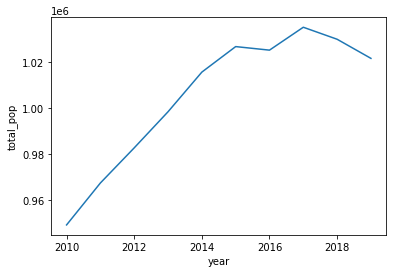

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Visualize the target
sns.lineplot(data=sample, x="year", y='total_pop')
plt.show()

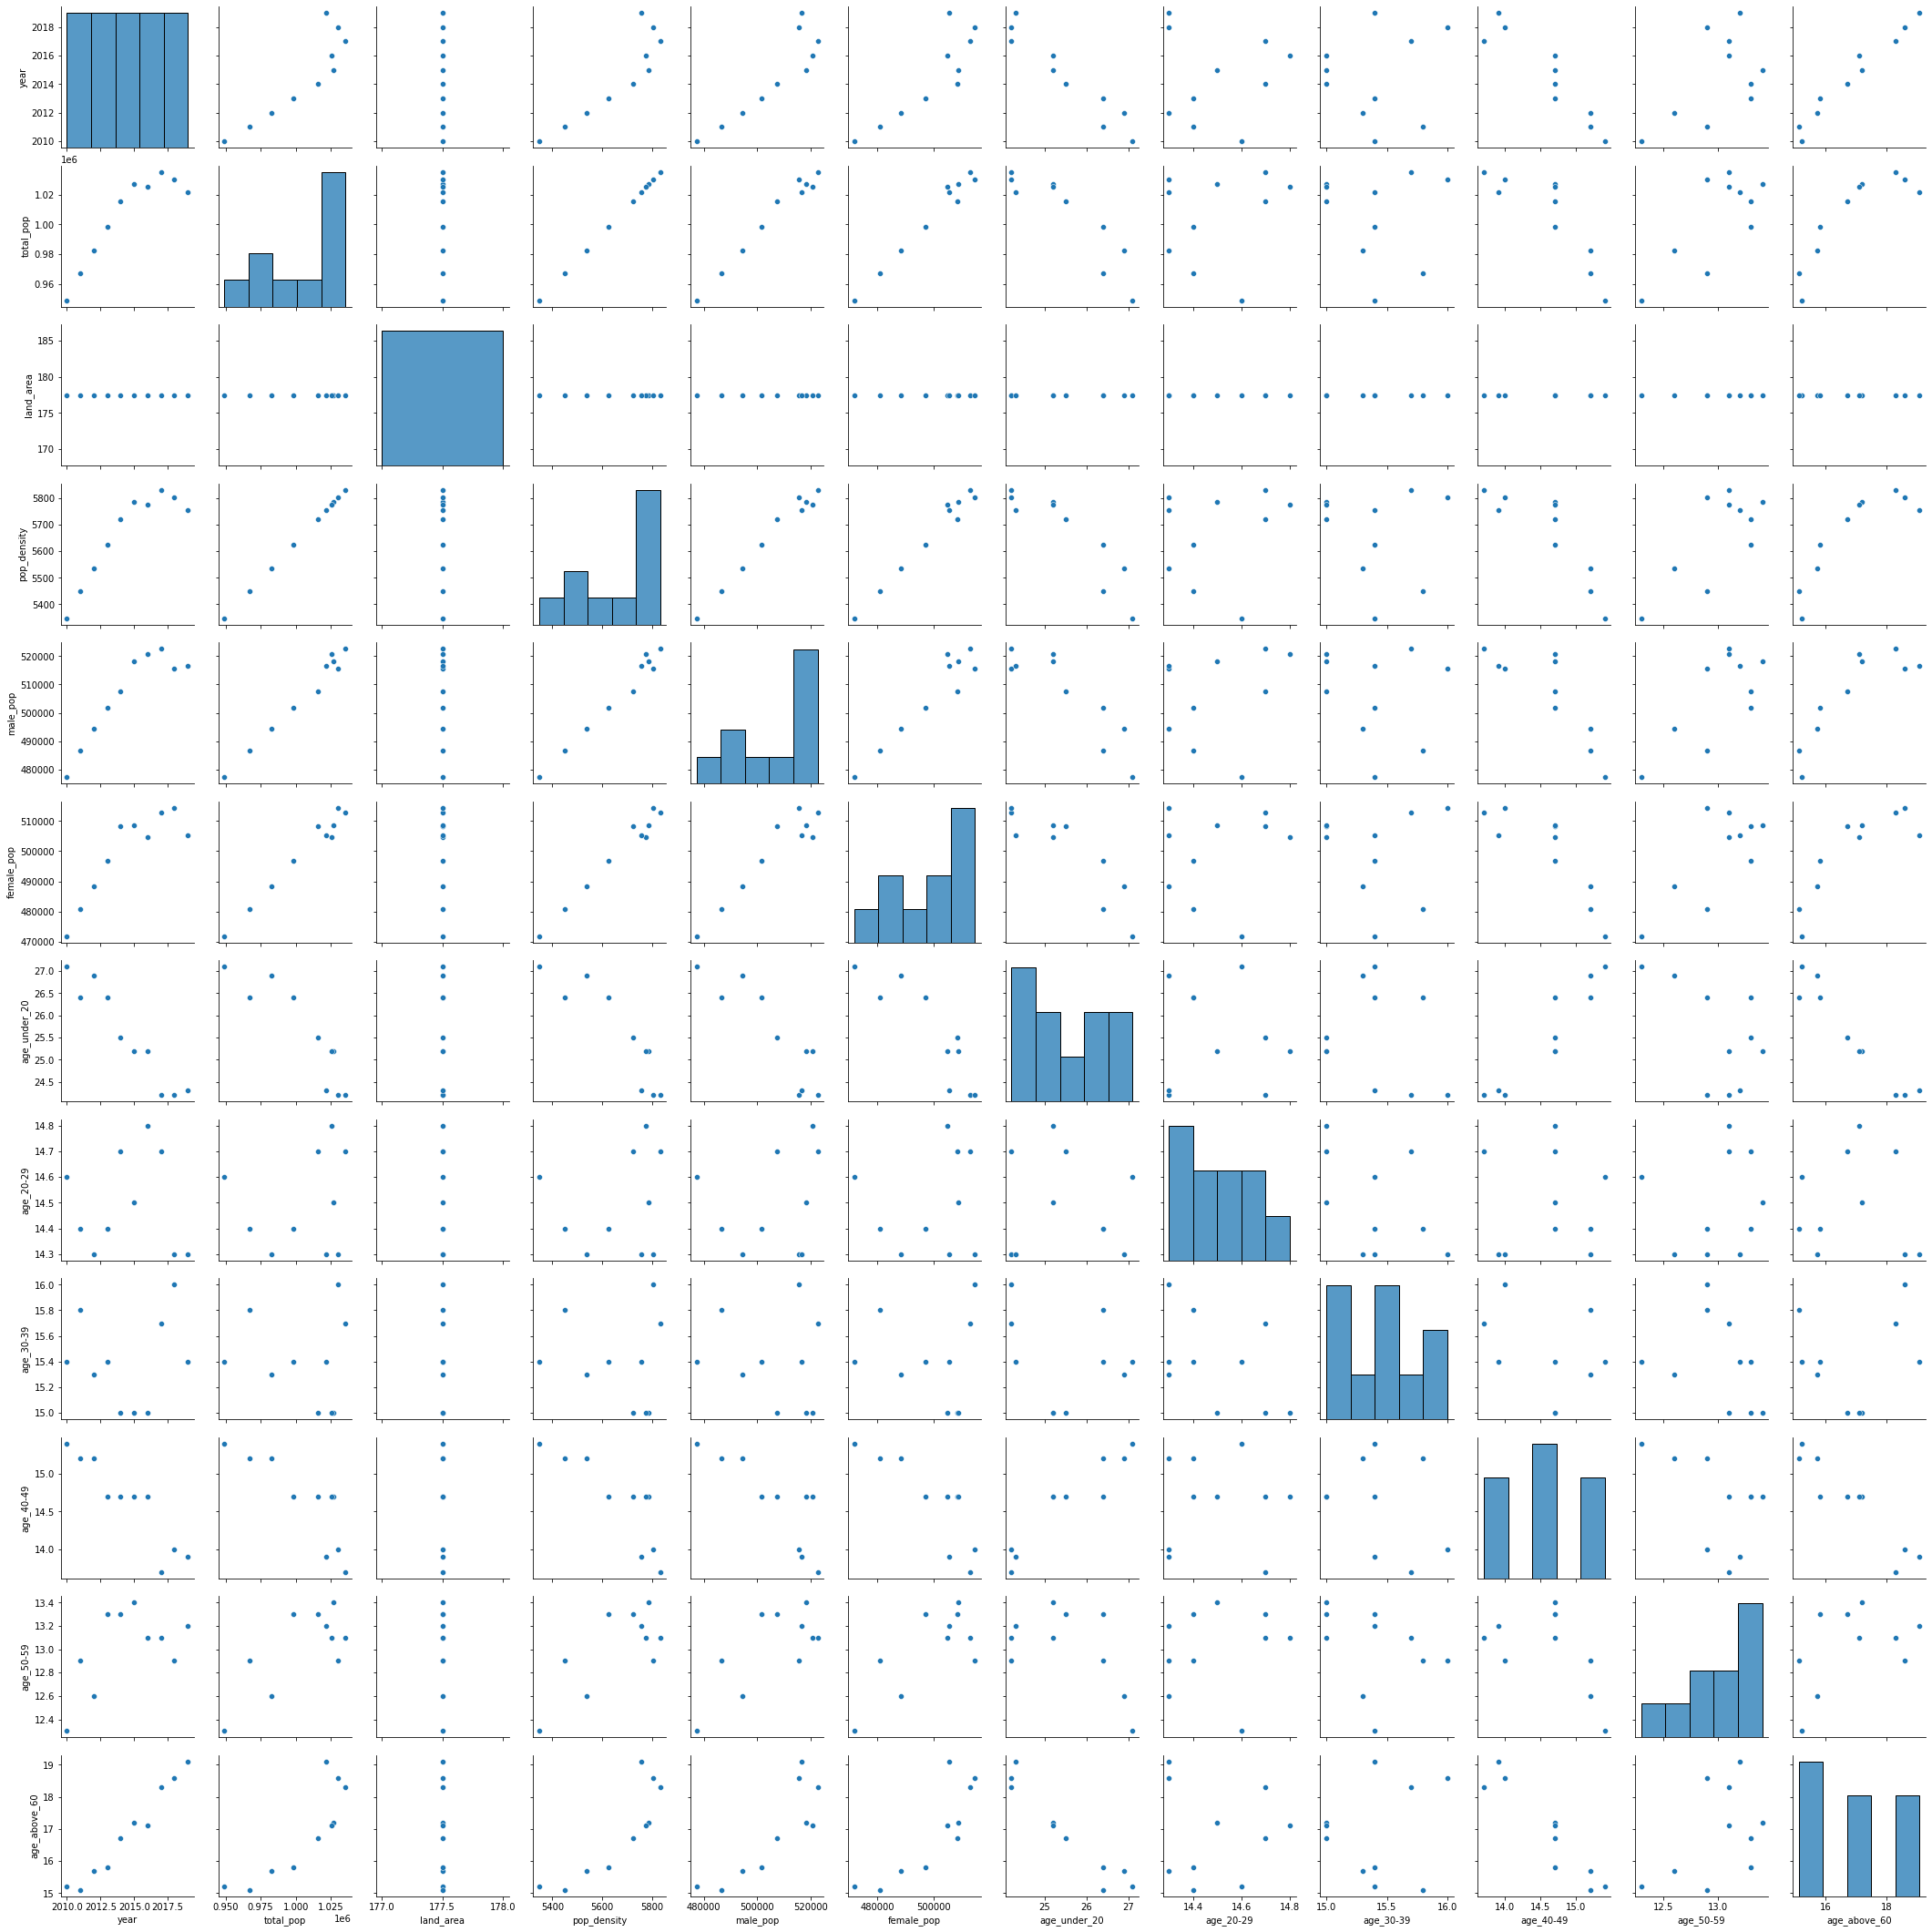

In [ ]:
# Visualize comparison of target to features
sns.pairplot(sample)
plt.show()

In [ ]:
from datetime import datetime

# Converting game_date to datetime
sample['year'] = pd.to_datetime(sample['year'], format='%Y')
sample['year'] = sample['year'].dt.year

# # Altering data to be used as constraints in train/test split
# cutoff = pd.to_datetime('2018')

# # Seperate train and test sets
# train = sample[(sample['year'] <= cutoff)]
# test  = sample[(sample['year'] > cutoff)]

# train.shape, test.shape
sample

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,city,state,city_state,year,total_pop,land_area,pop_density,male_pop,female_pop,age_under_20,age_20-29,age_30-39,age_40-49,age_50-59,age_above_60
170,San Jose,CA,"San Jose, CA",2010,949197,177.5,5347.588732,477347,471850,27.1,14.6,15.4,15.4,12.3,15.2
171,San Jose,CA,"San Jose, CA",2011,967478,177.5,5450.580282,486623,480855,26.4,14.4,15.8,15.2,12.9,15.1
172,San Jose,CA,"San Jose, CA",2012,982783,177.5,5536.805634,494487,488296,26.9,14.3,15.3,15.2,12.6,15.7
173,San Jose,CA,"San Jose, CA",2013,998514,177.5,5625.430986,501691,496823,26.4,14.4,15.4,14.7,13.3,15.8
174,San Jose,CA,"San Jose, CA",2014,1015796,177.5,5722.794366,507542,508254,25.5,14.7,15.0,14.7,13.3,16.7
175,San Jose,CA,"San Jose, CA",2015,1026919,177.5,5785.459155,518317,508602,25.2,14.5,15.0,14.7,13.4,17.2
176,San Jose,CA,"San Jose, CA",2016,1025373,177.5,5776.749296,520732,504641,25.2,14.8,15.0,14.7,13.1,17.1
177,San Jose,CA,"San Jose, CA",2017,1035353,177.5,5832.974648,522618,512735,24.2,14.7,15.7,13.7,13.1,18.3
178,San Jose,CA,"San Jose, CA",2018,1030119,177.5,5803.487324,515713,514406,24.2,14.3,16.0,14.0,12.9,18.6
179,San Jose,CA,"San Jose, CA",2019,1021786,177.5,5756.540845,516559,505227,24.3,14.3,15.4,13.9,13.2,19.1


In [4]:
sample = sample[['year', 'total_pop']]
sample

,year,total_pop
170,2010,949197
171,2011,967478
172,2012,982783
173,2013,998514
174,2014,1015796
175,2015,1026919
176,2016,1025373
177,2017,1035353
178,2018,1030119
179,2019,1021786


In [6]:
sample.columns = ['ds', 'y']
sample

,ds,y
170,2010,949197
171,2011,967478
172,2012,982783
173,2013,998514
174,2014,1015796
175,2015,1026919
176,2016,1025373
177,2017,1035353
178,2018,1030119
179,2019,1021786


In [7]:
sample['ds'] = pd.to_datetime(sample['ds'], format='%Y')
# sample['ds'] = sample['ds'].dt.year

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [8]:
sample.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [9]:
m = Prophet()
m.fit(sample)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


In [10]:
future = m.make_future_dataframe(periods=5, freq= 'y')
future.tail()

,ds
10,2019-12-31
11,2020-12-31
12,2021-12-31
13,2022-12-31
14,2023-12-31


In [11]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
10,2019-12-31,961262.968874,958266.514300,9.640145e+05
11,2020-12-31,995470.373050,983995.219670,1.007031e+06
12,2021-12-31,977320.589390,953370.501777,1.000106e+06
13,2022-12-31,955738.134311,917154.484839,9.953160e+05
14,2023-12-31,930650.022335,874556.416578,9.858987e+05


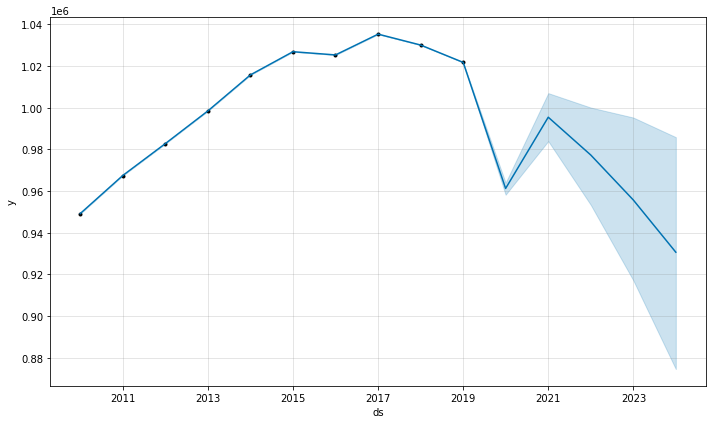

In [12]:
m.plot(forecast);

In [13]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [14]:
import pickle

# Save the Model to file in the current working directory
Pkl_Filename = "FbProphet.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(m, file)

In [16]:
# Load in and try out the new pickled model
with open(Pkl_Filename, 'rb') as file:  
    FbProphet_model = pickle.load(file)

FbProphet_model

In [18]:
future2 = FbProphet_model.make_future_dataframe(periods=5, freq= 'y')
future2.tail()

,ds
10,2019-12-31
11,2020-12-31
12,2021-12-31
13,2022-12-31
14,2023-12-31


In [19]:
forecast2 = FbProphet_model.predict(future2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
10,2019-12-31,961262.968874,958700.805692,9.643262e+05
11,2020-12-31,995470.373050,985492.184368,1.007731e+06
12,2021-12-31,977320.589390,955811.209420,1.000673e+06
13,2022-12-31,955738.134311,919199.783920,9.908587e+05
14,2023-12-31,930650.022335,881645.108110,9.821791e+05


In [ ]:
X = sample.iloc[:, 0].values.reshape(-1, 1)
y = sample.iloc[:, 1].values.reshape(-1, 1)

X

array([[2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019]])

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X, y)
y_pred = model.predict([[2020]])
y_pred

array([[1053543.06666667]])

In [ ]:
model.score(X, y)

0.8021570703049702

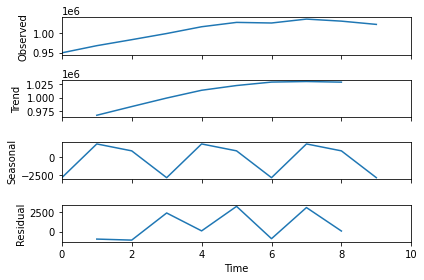

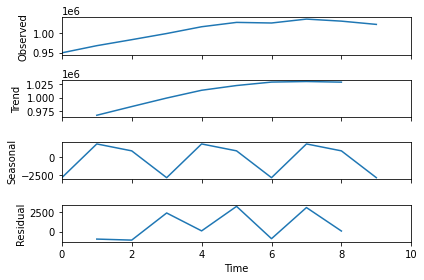

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose 

# sample.index = sample.year
result = seasonal_decompose(sample['total_pop'].values, freq=3) 
result.plot()

In [ ]:
# pip install pmdarima 

     |████████████████████████████████| 1.5MB 4.4MB/s 
     |████████████████████████████████| 808kB 26.4MB/s 
     |████████████████████████████████| 2.1MB 31.6MB/s 
     |████████████████████████████████| 8.7MB 42.4MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: setuptools 50.3.0
    Uninstalling setuptools-50.3.0:
      Successfully uninstalled setuptools-50.3.0
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
# Import the library 
from pmdarima import auto_arima 
  
# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 
  
# Fit auto_arima function to AirPassengers dataset 
stepwise_fit = auto_arima(sample['total_pop'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit.summary()  

ValueError: ignored

In [ ]:
# Fitting Random Forest Regression to the dataset 
# import the regressor 
from sklearn.ensemble import RandomForestRegressor 
  
# create regressor object 
rfr = RandomForestRegressor(n_estimators = 100, random_state = 7) 
  
# fit the regressor with x and y data 
rfr.fit(X, y.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=7, verbose=0, warm_start=False)

In [ ]:
y_pred2 = rfr.predict([[2020]])
y_pred2

array([1025228.88])

In [ ]:
rfr.score(X, y)

0.9800537537129942

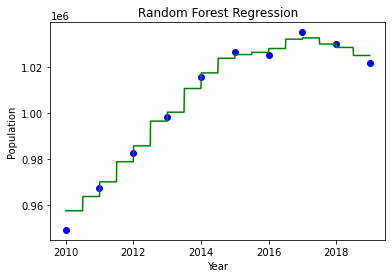

In [ ]:
# Visualising the Random Forest Regression results 
  
# arange for creating a range of values 
# from min value of x to max  
# value of x with a difference of 0.01  
# between two consecutive values 
X_grid = np.arange(min(X), max(X), 0.01)  
  
# reshape for reshaping the data into a len(X_grid)*1 array,  
# i.e. to make a column out of the X_grid value                   
X_grid = X_grid.reshape((len(X_grid), 1)) 
  
# Scatter plot for original data 
plt.scatter(x, y, color = 'blue')   
  
# plot predicted data 
plt.plot(X_grid, rfr.predict(X_grid),  
         color = 'green')  
plt.title('Random Forest Regression') 
plt.xlabel('Year') 
plt.ylabel('Population') 
plt.show()

In [ ]:
import xgboost as xgb

xgbr = xgb.XGBRegressor(verbosity=0)
xgbr.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)

In [ ]:
y_pred3 = xgbr.predict([[2050]])
y_pred3

array([1021695.4], dtype=float32)

In [ ]:
xgbr.score(X, y)

0.9995389763233216